# Tutorial on the Visualization of Results

Learn how to use `qDNA`'s predefined plotting routines for visualizing results effectively. In this notebook you can explore the potential of data visualizations within the package.   

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/4_Visualization.ipynb)

In [4]:
%load_ext autoreload
%autoreload 2

# Flags
save = False          # Set to True to enable saving results (currently unused in this script)
verbose = True        # Set to True to enable detailed logging

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [5]:
import os
import importlib.util

# Check if the 'qDNA' package is already installed
qDNA_installed = importlib.util.find_spec('qDNA') is not None

if qDNA_installed:
    if verbose:
        print("Package 'qDNA' is already installed.")
        # Optional: Uncomment the next line to display qDNA package information
        # %pip show qDNA
else:
    # Install 'qDNA' package if not installed
    %pip install qDNA
    if verbose:
        print("Successfully installed the 'qDNA' package.")

Package 'qDNA' is already installed.


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

from qDNA import ROOT_DIR as ROOT_DIR_QDNA

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directories for data and figures
DATA_DIR = os.path.join(ROOT_DIR, "data", "my_tb_params")
FIG_DIR = os.path.join(ROOT_DIR_QDNA, "qDNA", "data", "figures_tutorials")

# Ensure the directories exist (create them if they don't already exist)
os.makedirs(DATA_DIR, exist_ok=True)

SAVE_DIR = os.path.join(os.getcwd(), "my_figures")  # Directory for plots 
if save:
    os.makedirs(os.path.join(os.getcwd(), SAVE_DIR), exist_ok=True)

if verbose:
    # Print the status of the directories for debugging purposes
    print(f"Data directory: '{DATA_DIR}' is ready.")
    print(f"Figures directory: '{FIG_DIR}' is ready.")
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Data directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\data\my_tb_params' is ready.
Figures directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA\qDNA\data\figures_tutorials' is ready.
Save directory: 'C:\Users\Dennis Herb\OneDrive\2_Uni\Doktor\python_projects\QuantumDNA-notebooks\tutorials\my_figures' is ready.


## Analysis of the Eigenspectrum

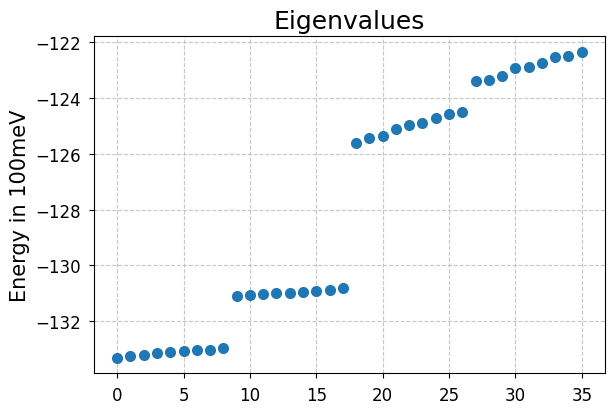

In [11]:
from qDNA import get_me_solver, plot_eigv

kwargs=dict()
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plt.subplots()
plot_eigv(ax, me_solver.tb_ham)

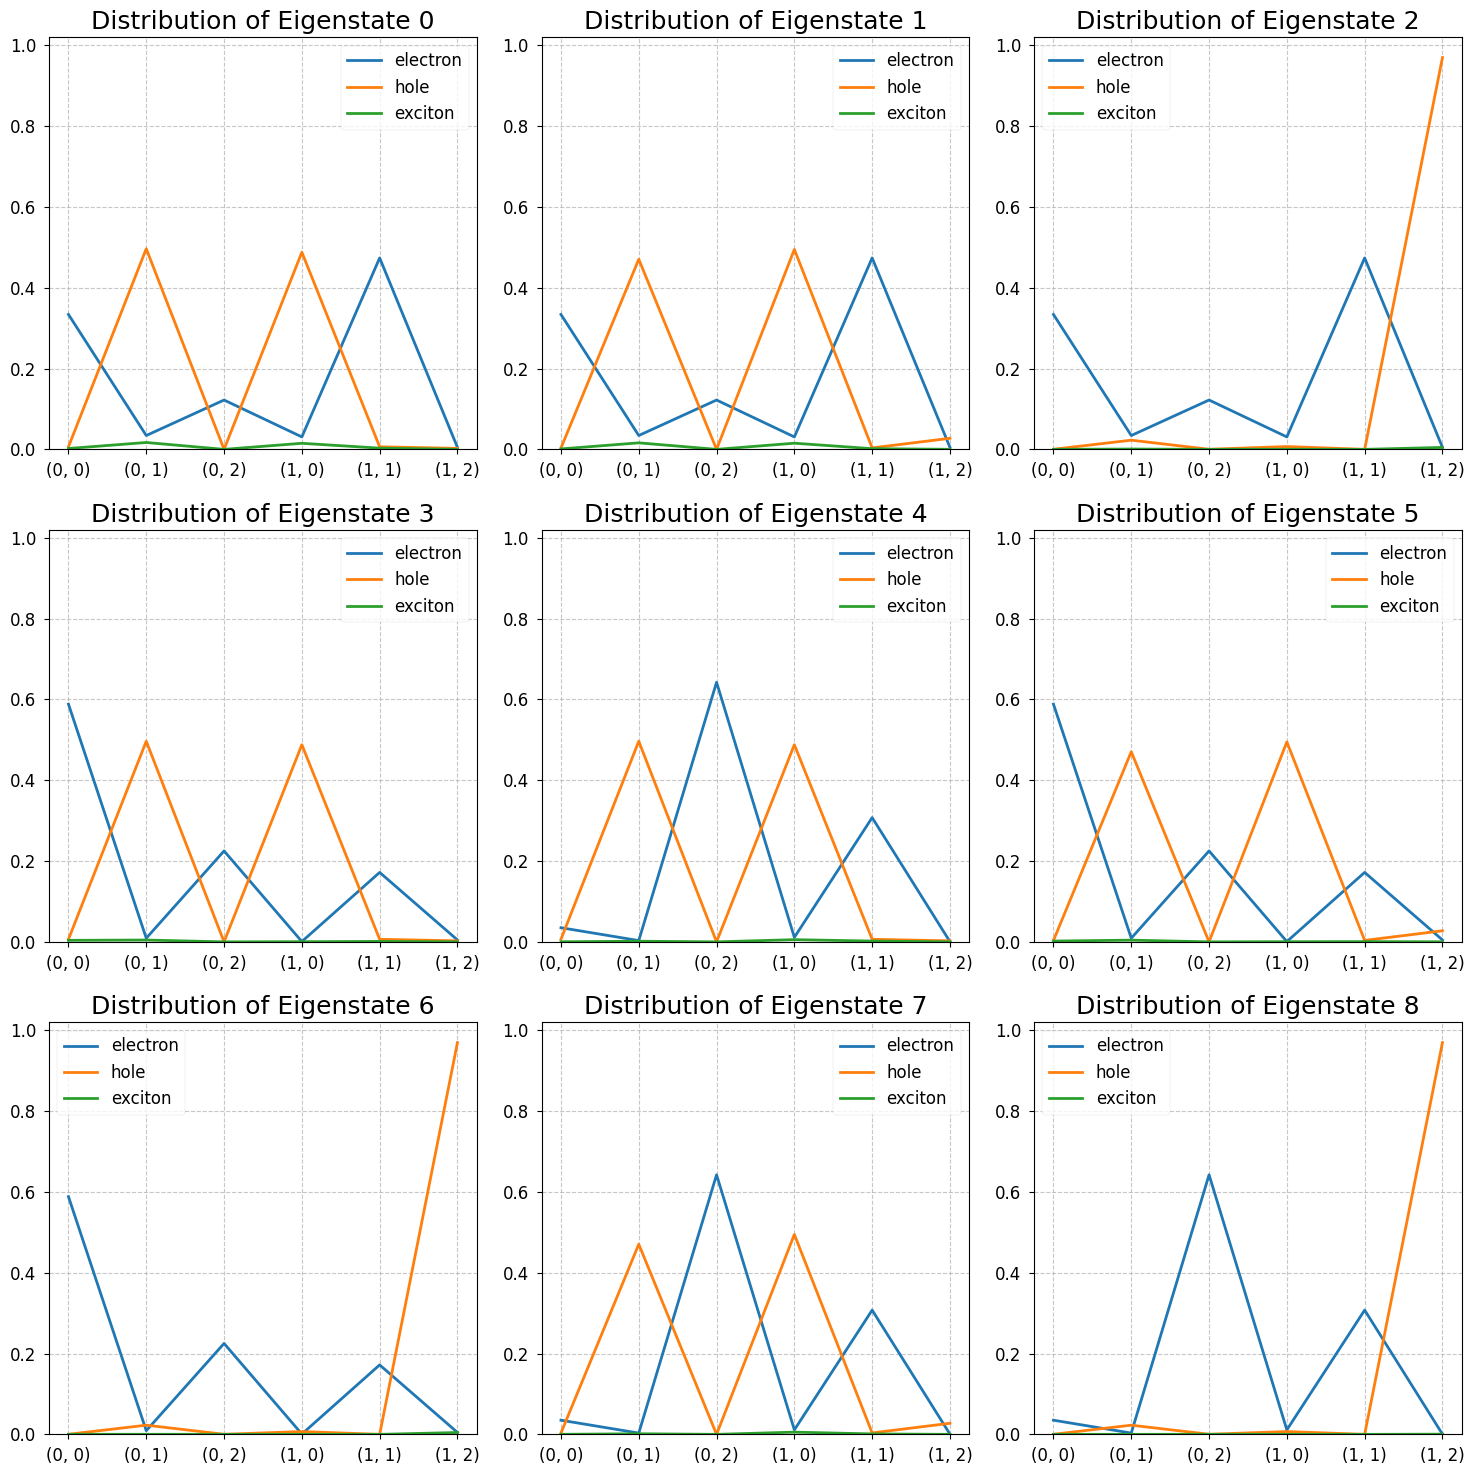

In [25]:
from qDNA import get_me_solver, plot_eigs

kwargs=dict()
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

num_rows, num_cols = 3, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows) )
for i, ax in enumerate(axes.flatten()[:num_rows*num_cols]):
    plot_eigs(ax, me_solver.tb_ham, i)

## Fourier Analysis

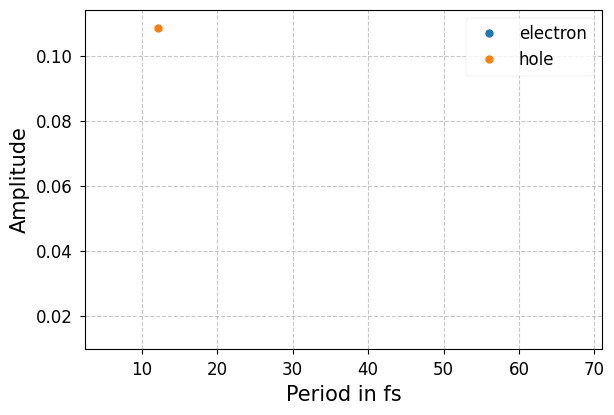

In [59]:
from qDNA import get_me_solver, plot_fourier

kwargs=dict(particles=['electron', 'hole'])
upper_strand, tb_model_name= 'GA', 'WM'
tb_site = '(0, 1)'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plt.subplots()
plot_fourier(ax, me_solver.tb_ham, me_solver.init_state, tb_site, 'Period')

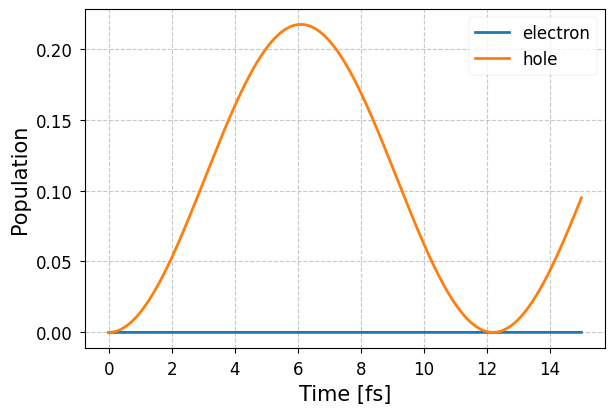

In [58]:
from qDNA import get_me_solver, plot_pop_fourier

kwargs=dict(particles=['electron', 'hole'], t_end=15, t_unit='fs')
upper_strand, tb_model_name= 'GA', 'WM'
tb_site = '(0, 1)'

# plotting
me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)
fig, ax = plt.subplots()
plot_pop_fourier(ax, me_solver.tb_ham, me_solver.init_state, tb_site, me_solver.times, me_solver.t_unit)

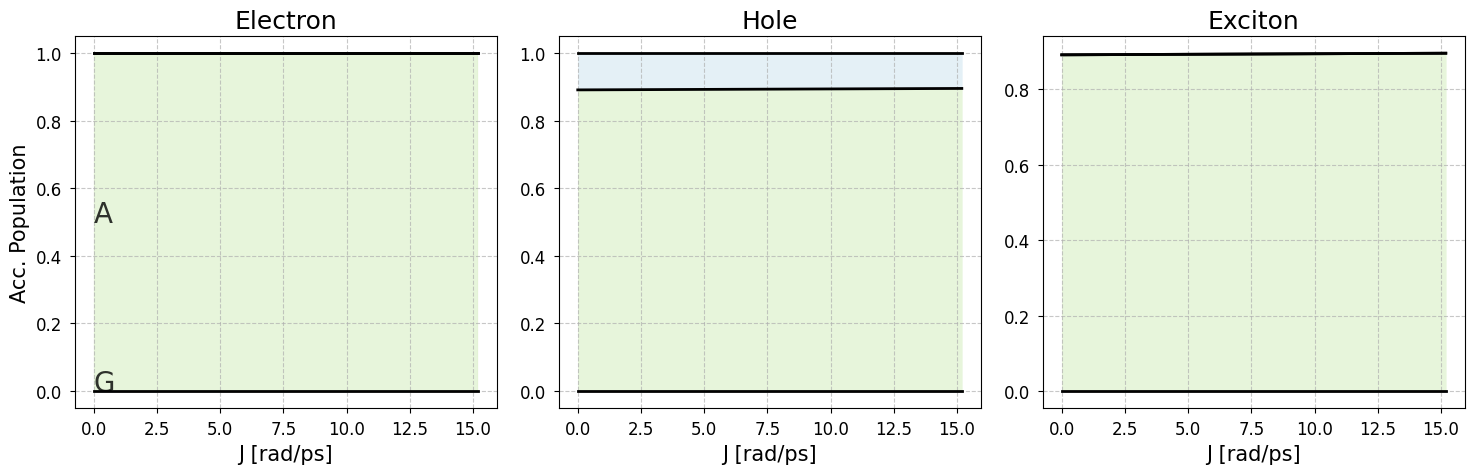

In [50]:
from qDNA import get_me_solver, plot_average_pop

kwargs=dict()
upper_strand, tb_model_name= 'GA', 'WM'
J_list, J_unit = np.linspace(0,10,100), 'meV'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plt.subplots(1,3, figsize=(15,5))
plot_average_pop(ax, me_solver.tb_ham, J_list, J_unit)

## Analysis of Populations and Coherences

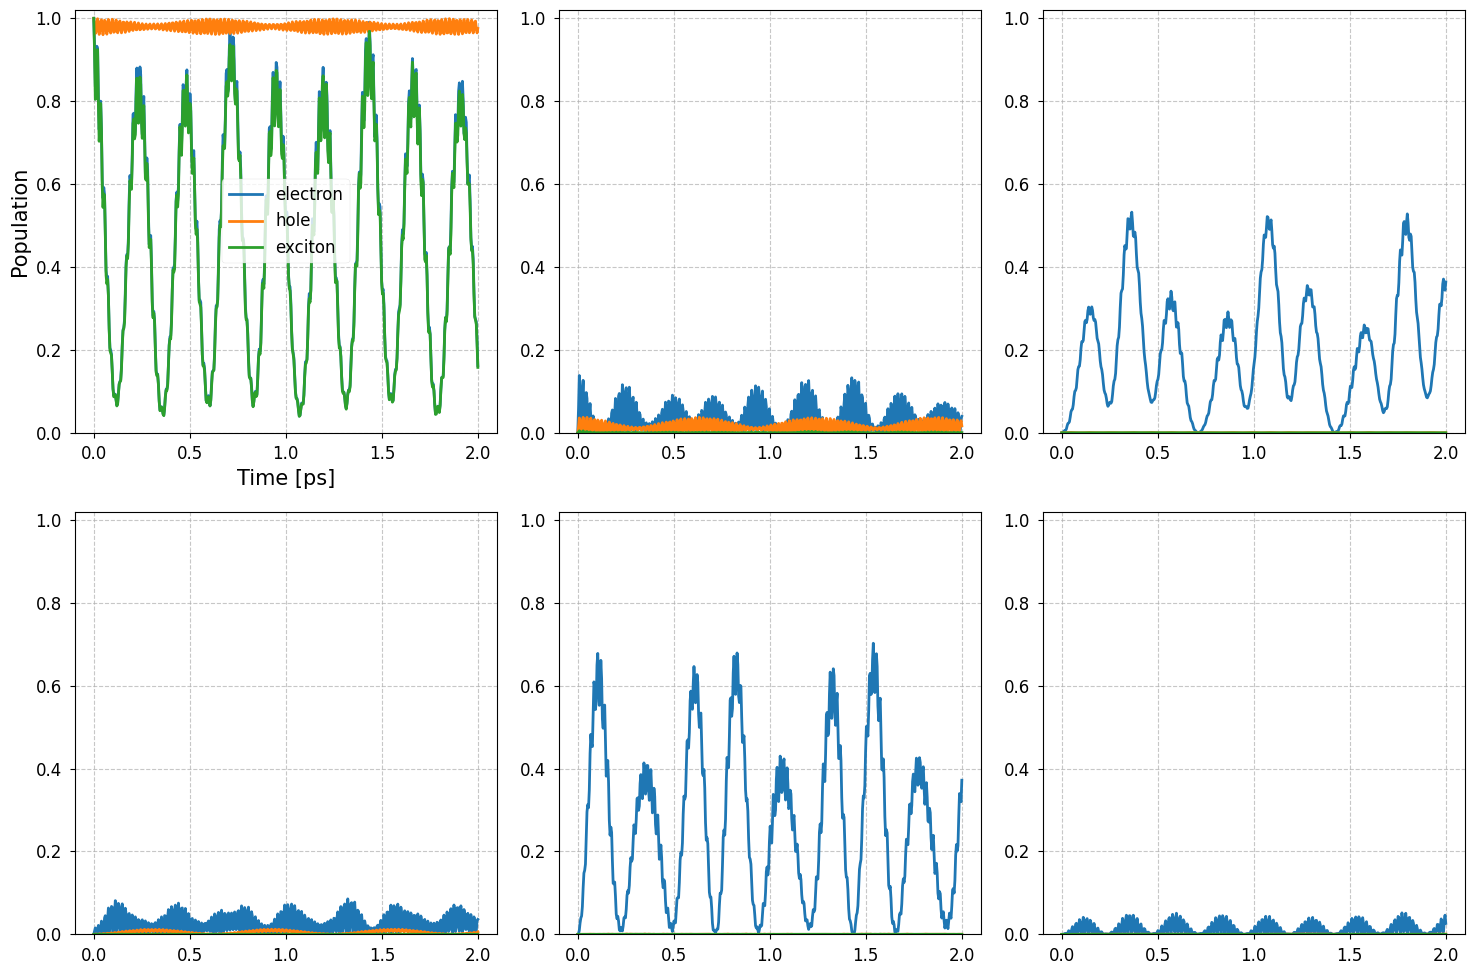

In [62]:
from qDNA import get_me_solver, plot_pops

kwargs=dict(source="Hawke2010", t_end=2)
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plot_pops(me_solver)

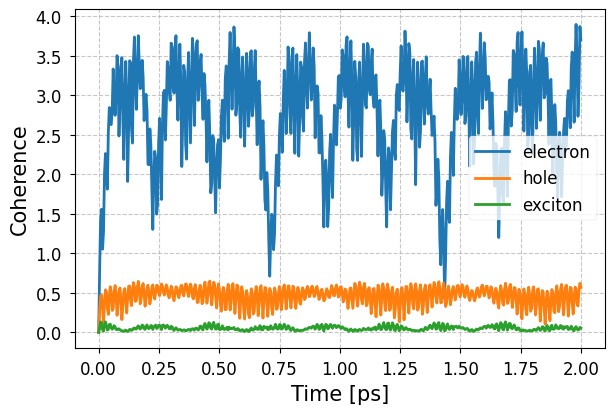

In [63]:
from qDNA import get_me_solver, plot_coh

kwargs=dict(source="Hawke2010", t_end=2)
upper_strand, tb_model_name= 'GCG', 'ELM'

me_solver = get_me_solver(upper_strand, tb_model_name, **kwargs)

fig, ax = plt.subplots()
plot_coh(ax, me_solver)